In [1]:
import netCDF4
from numpy import *
import matplotlib.pyplot as plt
import xarray as xr
import PyNIO as Nio
import pandas as pd
import glob
from scipy.stats import *

from scipy.stats.stats import pearsonr
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

from area_mean import *
from binned_cyFunctions5 import *
from read_hs_file import read_var_mod
from get_LWPCMIP6data import *
#from get_annual_so import *
from useful_func_cy import *

from loop_small_LRM import *



In [19]:
def stats_matrics_Visualization(modn = 'IPSLCM6ALR'):
    
    
    WD = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/'


    folder =  glob.glob(WD+ modn+'__'+ 'STAT_pi+abr_'+'22x_31y'+'.npz')
    print(folder)

    output_ARRAY  =  load(folder[0], allow_pickle=True)  # str(TR_sst)
    y_gcm      =   array(output_ARRAY['bound_y'])
    x_gcm      =   array(output_ARRAY['bound_x'])
    output_stats1   = output_ARRAY['stats_1']
    output_stats2   = output_ARRAY['stats5']

    #.print(output_stat2.shape, array(y_gcm).shape, x_gcm)

    fig3, ax3  = plt.subplots(1, 2, figsize = (19.8, 9.8))  #(16.2, 9.3))

    #..defined a proper LWP ticks within its range
    p10_valuespace1 = nanpercentile(output_stats1, 25.) - nanpercentile(output_stats1, 15.)
    levels_value1  = linspace(nanpercentile(output_stats1, 0.5)-p10_valuespace1, nanpercentile(output_stats1, 98.5)+p10_valuespace1, 164)# arange(0.368, 0.534, 0.002)
    p10_valuespace2 = nanpercentile(output_stats2, 25.) - nanpercentile(output_stats2, 15.)
    levels_value2  = linspace(nanpercentile(output_stats2, 1.5)-p10_valuespace2, nanpercentile(output_stats2, 99.5)+p10_valuespace2, 164)

    #..print(linspace(nanpercentile(output_stat1, 1.5), nanpercentile(output_stat1, 98.5), 164))
    #..pick the desired colormap
    cmap  = plt.get_cmap('YlOrRd')   # 'YlOrRd'
    cmap_r = plt.get_cmap('YlOrRd_r')
    norm1 = BoundaryNorm(levels_value1, ncolors= cmap_r.N, extend='both')
    norm2 = BoundaryNorm(levels_value2, ncolors= cmap.N, extend='both')

    im1  = ax3[0].pcolormesh(x_gcm, y_gcm, output_stats1)   #..anmean_LWP_bin_Tskew_wvp..LWP_bin_Tskin_sub
    ax3[0].set_xlabel('SUB at 500mb, '+ r'$Pa s^{-1}$', fontsize= 15)
    ax3[0].set_ylabel('SST, ' + 'K', fontsize= 15)
    ax3[0].set_title(r"$(a)\ ABS\_bias:(deltaLWP_{pred} - deltaLWP_{GCM})$", loc='left', fontsize = 11)

    im2  = ax3[1].pcolormesh(x_gcm, y_gcm, array(output_stats2), cmap=cmap)
    ax3[1].set_xlabel('SUB at 500mb, '+ r'$Pa s^{-1}$', fontsize= 15)
    ax3[1].set_ylabel('SST, ' + 'K', fontsize= 15)
    ax3[1].set_title(r"$(b)\ R^{2}(PI\ predict\ with\ PI\ true LWP)$", loc='left', fontsize = 11)
    # ax3.set_title("exp 'abrupt-4xCO2' GCM: BCCESM1 predict R_2", loc='left', fontsize = 11)

    fig3.colorbar(im1, ax = ax3[0], label= r"$(kg\ m^{-2})$")
    fig3.colorbar(im2, ax = ax3[1], label= r"$R^{2}: Coefficient\ of\ Determinations $")


    ax3[0].set_xlabel('SUB at 500mb, '+ r'$Pa s^{-1}$', fontsize= 15)
    ax3[0].set_ylabel('SST, ' + 'K', fontsize= 15)

    plt.suptitle(modn+": Bias Metrics for USING piControl data Predict abr4xCO2 LWP", fontsize =18)

    # plt.legend(loc='upper right',  fontsize= 12)

    #.. plt.savefig("model_bias_" + modn)


    #plt.pcolormesh(x_gcm, y_gcm, output_stats2)
    
    return None


In [20]:
deck_nas = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MIROC6', 'MRIESM20']
deck_nas2 = ['CNRMESM2', 'SAM0']

['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/BCCESM1__STAT_pi+abr_22x_31y.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/CanESM5__STAT_pi+abr_22x_31y.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/CESM2__STAT_pi+abr_22x_31y.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/CESM2FV2__STAT_pi+abr_22x_31y.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/CESM2WACCM__STAT_pi+abr_22x_31y.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/GISSE21G__STAT_pi+abr_22x_31y.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/GISSE21H__STAT_pi+abr_22x_31y.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/IPSLCM6ALR__STAT_pi+abr_22x_31y.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/MIROC6__STAT_pi+abr_22x_31y.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/MRIESM20__STAT_pi+abr_22x_31y.npz']


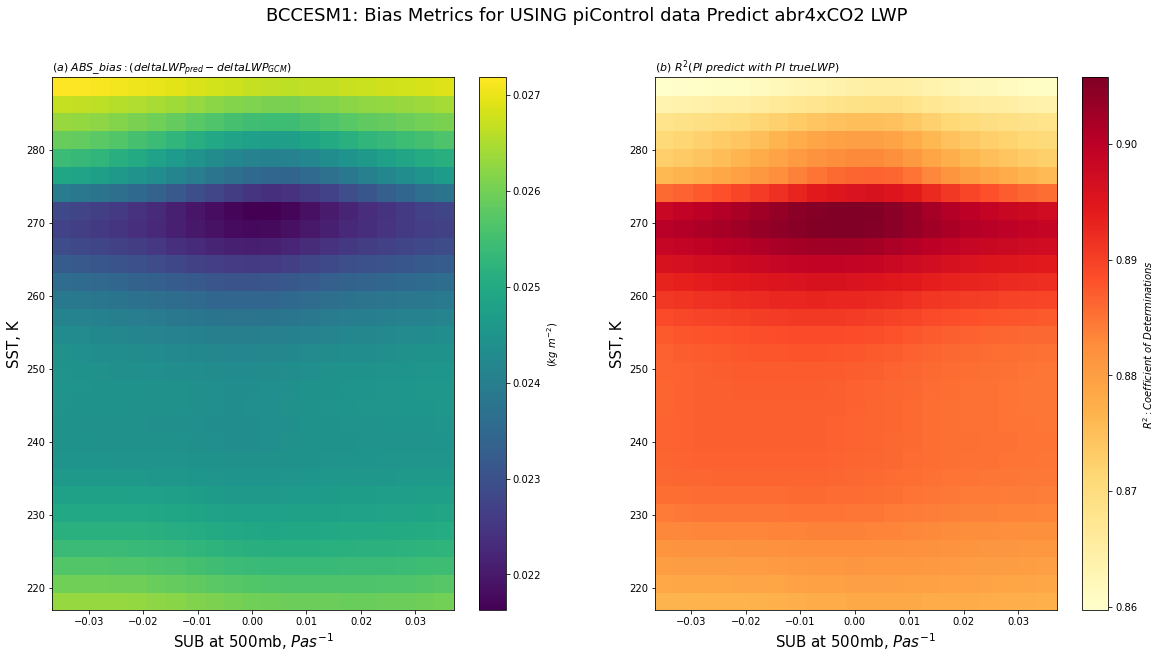

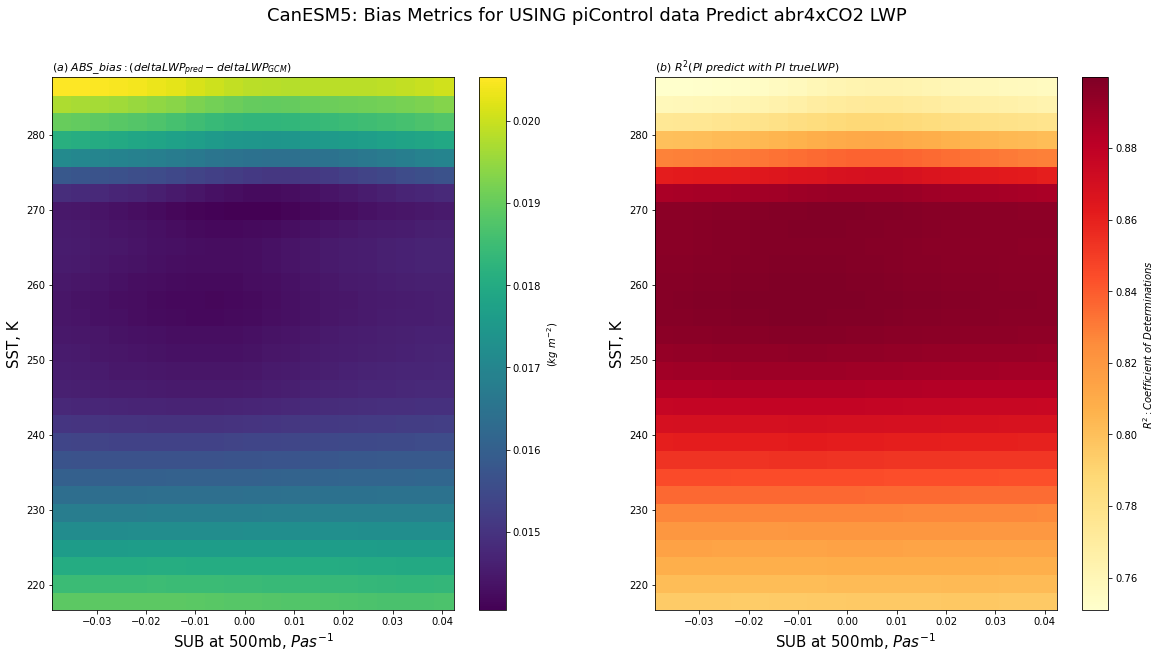

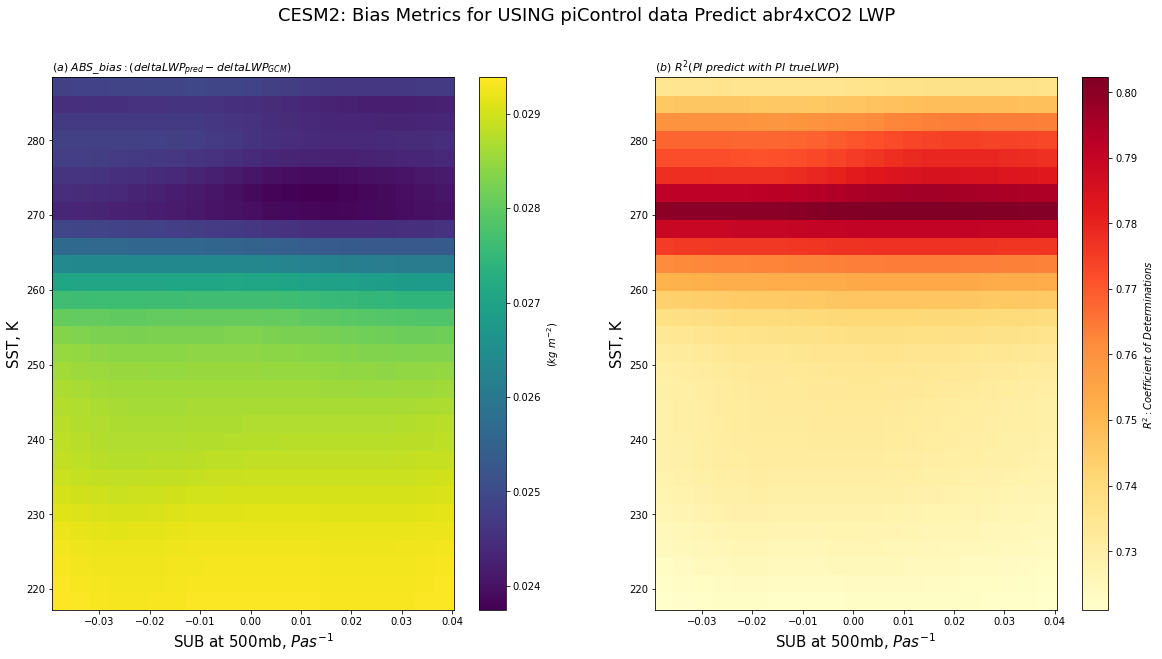

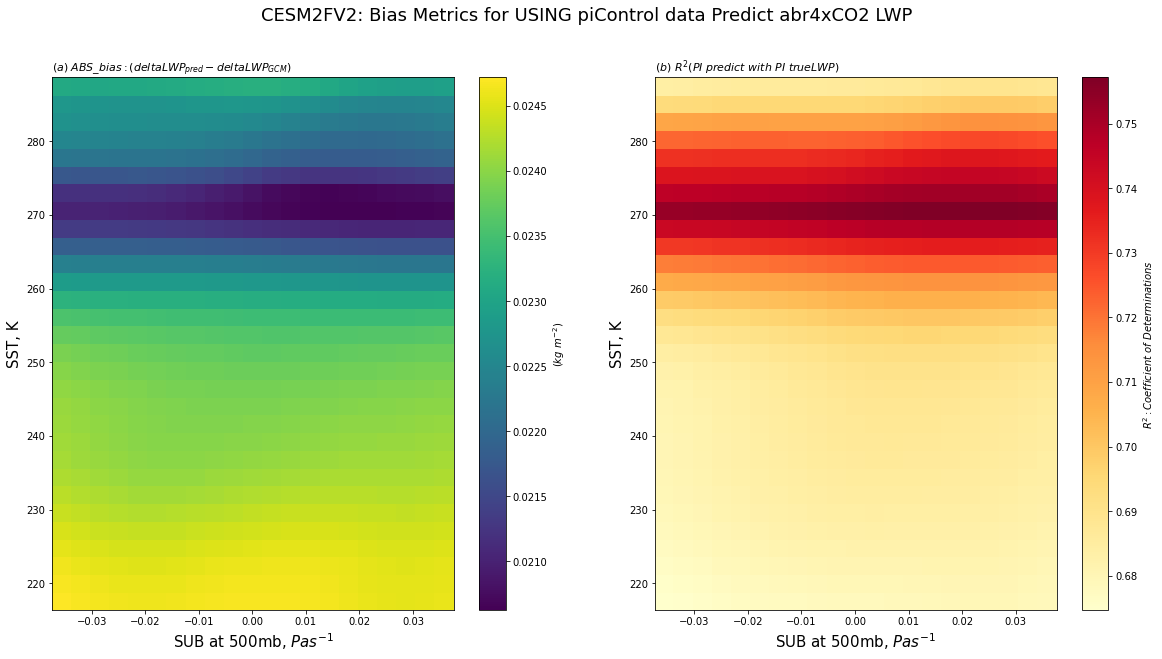

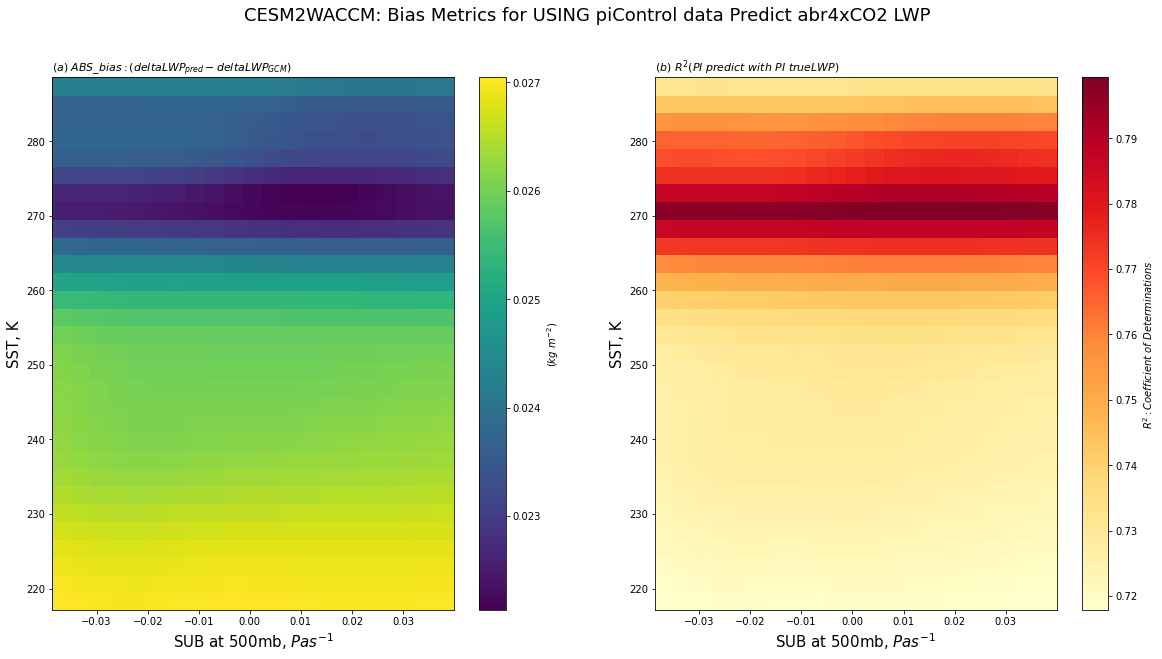

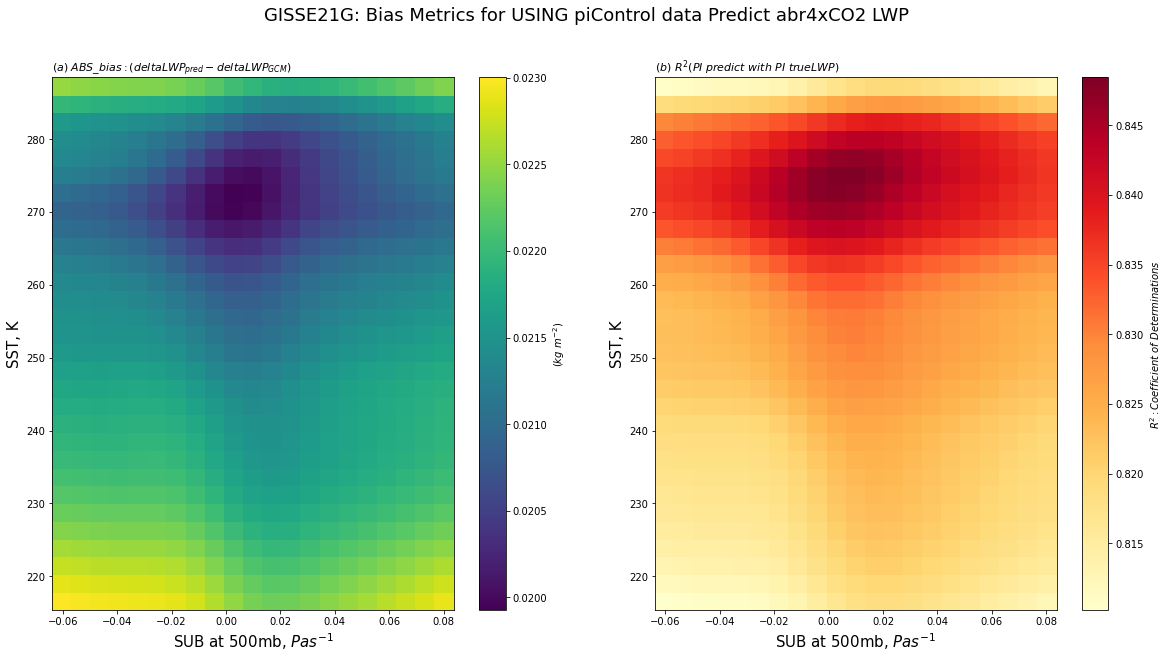

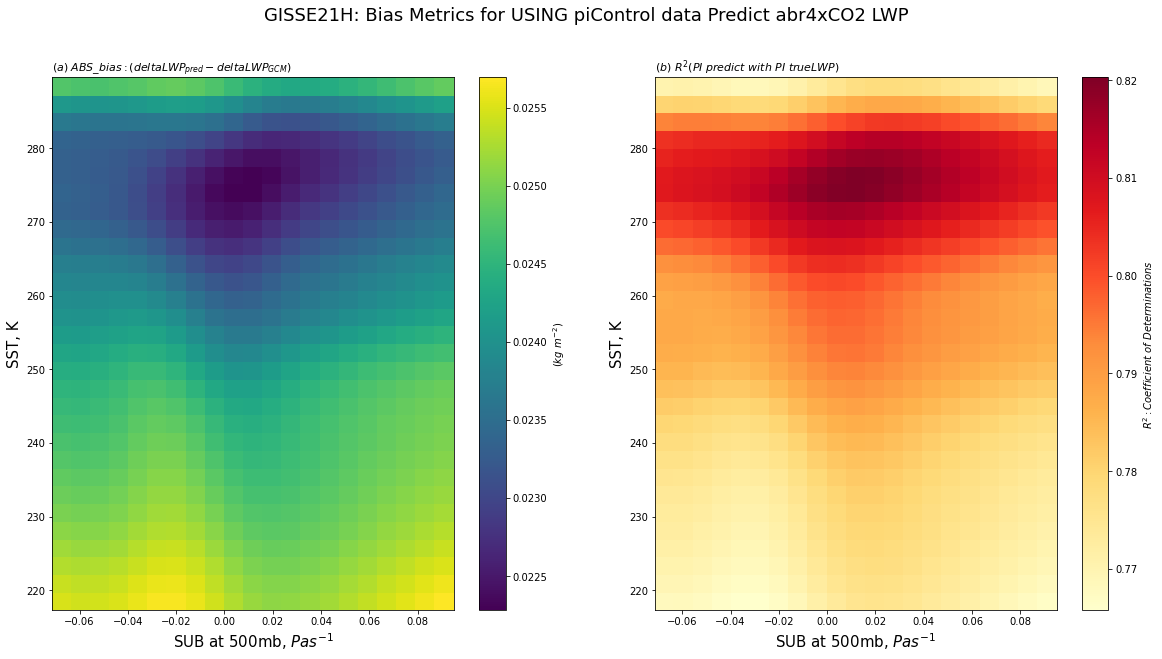

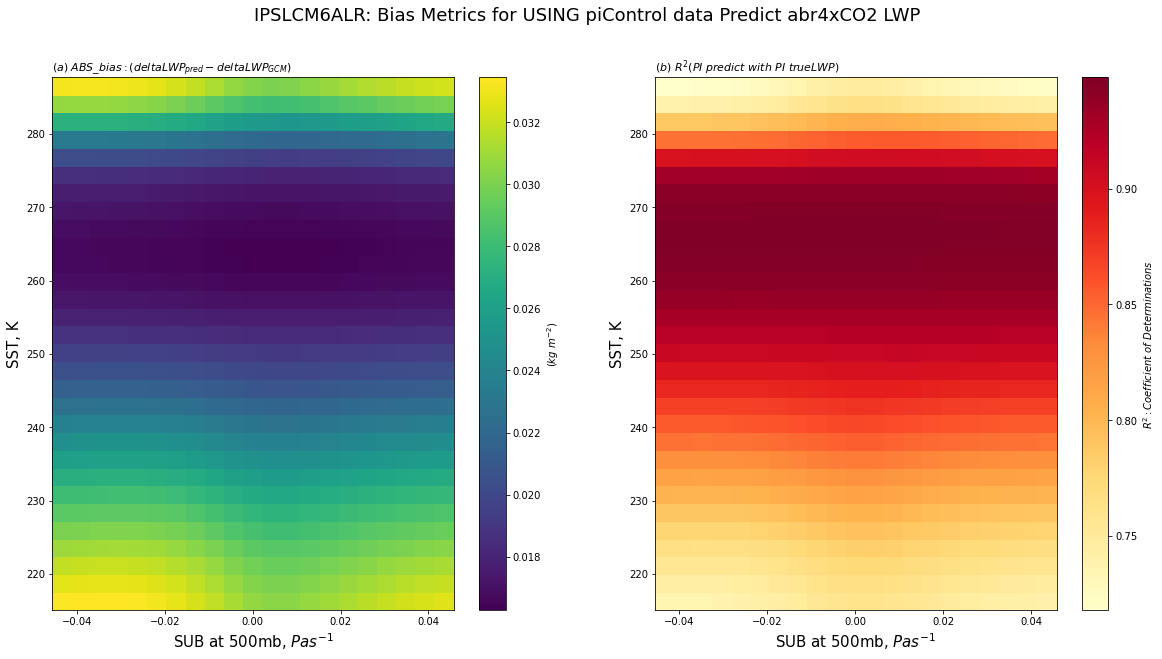

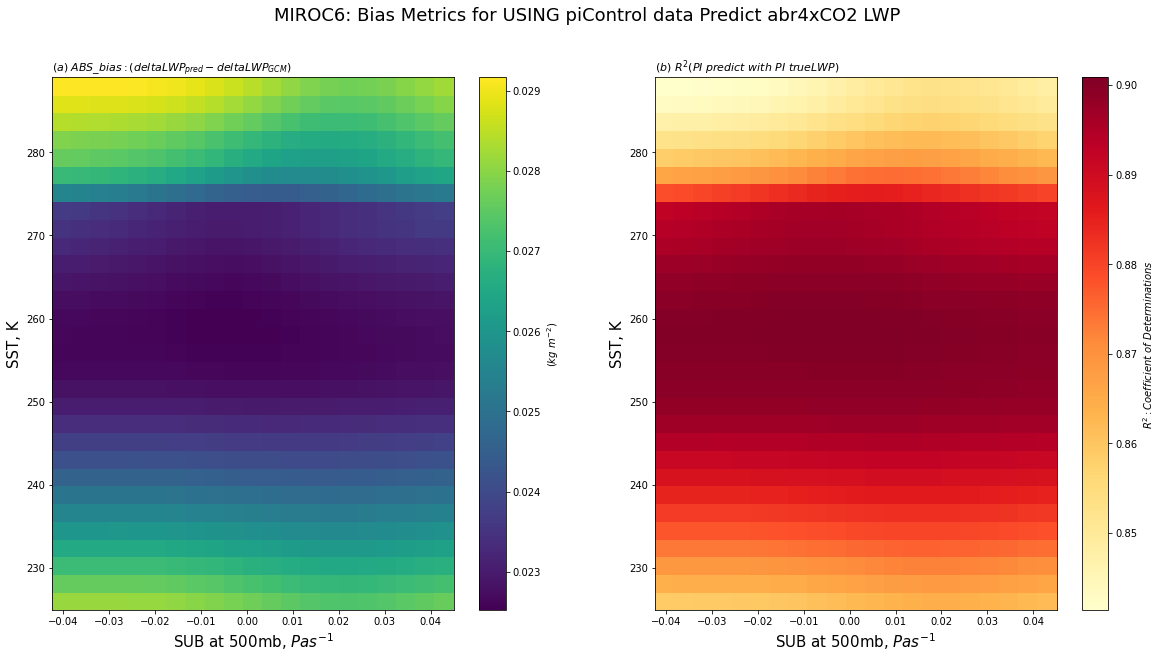

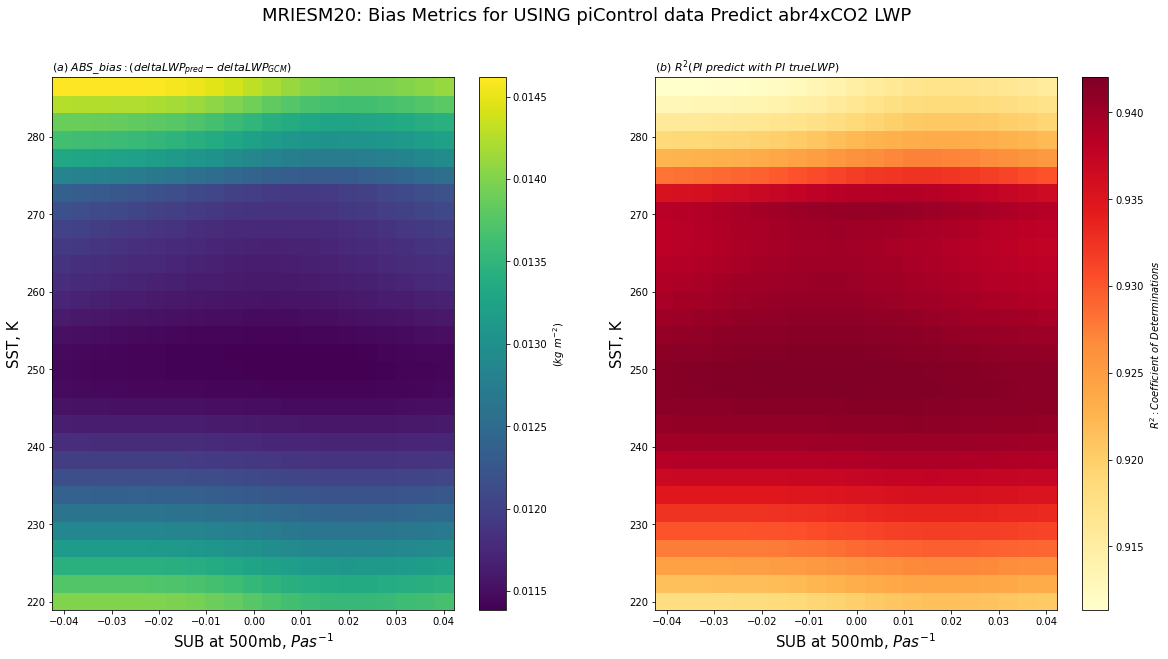

In [22]:
for i in arange(len(deck_nas)):

    stats_matrics_Visualization(modn=deck_nas[i])

In [11]:
modn = 'SAM0'
WD = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/'


folder =  glob.glob(WD+ modn+'__'+ 'STAT_pi+abr_'+'22x_31y'+'.npz')
print(folder)

output_ARRAY  =  load(folder[0], allow_pickle=True)  # str(TR_sst)
TR_sst1      =   output_ARRAY['TR_minabias_SST']
TR_sub1      =   output_ARRAY['TR_minabias_SUB']
TR_sst2   = output_ARRAY['TR_maxR2_SST']
TR_sub2   = output_ARRAY['TR_maxR2_SUB']

#.. TR_minabias_SST=, TR_minabias_SUB=, TR_maxR2_SST=, TR_maxR2_SUB=


print(TR_sst1, TR_sub1)
print(TR_sst2, TR_sub2)


['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/SAM0__STAT_pi+abr_22x_31y.npz']
272.0128156046549 0.009749369828163497
269.54484326985676 0.0023171842856598637


In [21]:
deck_nas  = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0']

SAM0={'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
         'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

if (exp=='piControl')|(exp=='amip'):

    MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r2i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
         'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
         'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f3', 'gg': 'gn', "typevar": 'Amon'}   #  Be careful, failure due to 'day time representation'
UKESM10 = {'modn': 'UKESM1-0-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}   # the same day time representation issue as 'HadGem3', dont have 'wap' variable in 'pi-Control' exp
IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
CNRMCM6 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}# time doesn't corresponding for 'evspsbl' in  'pi-Control' exper

CNRMESM2 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
           'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MIROCES2L= {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}#


GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}# missing lots of Variables
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
ACCESSCM2 = {'modn': 'ACCESS-CM2', 'consort': 'CSIRO-ARCCSS', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}#..'/glade/' don't have 'Amon' typevar
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r2i1p1f1', 'gg': 'gn', "typevar": 'Amon'}#  abrupt4x exper doesnt have 'ps' variable in r1i1p1f1
MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}#..'/glade/' dont have 'Amon' typevar
CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}#..'/glade/' dont have 'Amon' typevar
INM_CM50 = {'modn': 'INM-CM5-0', 'consort': 'INM', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}#..'/glade/' dont have 'Amon' typevar

NORESM2LM = {'modn': 'NorESM2-LM', 'consort': 'NCC', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}# missing a lot of variables and typevars
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}# time doesnt corresponding, lose a lot of files for different variables in both exper
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}#..'/glade/' dont have 'tas' variable
CMCC = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6',
        'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'} #..'/glade/' dont have 'abrupt-4xCO2'/'piControl' exper
ECE = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'} #..dont have 'Amon' or variable 'tas'
#ECE has different variants for exper
ECEV = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}#..too hard to operate

#ECEV has very discrete year in 'abrupt-4xCO2', semms continued but each in one yr file in 'piControl'
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}# '/glade/' dont have 'Amon' typever in 'abru4x'


deck  = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM2, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0]

output_ARRAY = {}
output_intermedia = {}

output_dict0_PI =  {}
output_dict0_abr = {}
output_mon_bin_abr={}
output_mon_bin_PI ={}
output_mon_bin_LWPactual_abr = {}
output_mon_bin_LWPactual_PI = {}

output_mon_bin_LWPpredi_PI =  {}
output_mon_bin_LWPpredi_abr = {}
# output_LRM_st =  {}
# output_LRM_le = {}
shape_mon_modelPI =  {}
shape_mon_modelabr = {}


fpath= '/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/'



for i in range(len(deck)):
    
    #.... 273K-0.0Pa-4lrm
    output_ARRAY[deck_nas[i]] =  load(fpath+deck[i]['modn']+'mond_'+str(273)+'K_'+'ud'+str(0.0)+'_dats.npz', allow_pickle=True)  # str(TR_sst)+str(TR_sub) 
    output_intermedia[deck_nas[i]]  = output_ARRAY[deck_nas[i]]['rawdata_dict']
    
    output_dict0_PI[deck_nas[i]]  =   output_intermedia[deck_nas[i]][()]['dict0_PI_var']
    output_dict0_abr[deck_nas[i]]  =   output_intermedia[deck_nas[i]][()]['dict0_abr_var']
    shape_mon_modelPI[deck_nas[i]]   =  output_dict0_PI[deck_nas[i]]['shape_yr']
    shape_mon_modelabr[deck_nas[i]]   =  output_dict0_abr[deck_nas[i]]['shape_yr']
    output_mon_bin_abr[deck_nas[i]]   = output_dict0_abr[deck_nas[i]]['dict1_mon_bin_abr']
    output_mon_bin_PI[deck_nas[i]]    = output_dict0_PI[deck_nas[i]]['dict1_mon_bin_PI']
    
    output_mon_bin_LWPactual_abr[deck_nas[i]]   =  output_mon_bin_abr[deck_nas[i]]['LWP_mon_bin']
    output_mon_bin_LWPactual_PI[deck_nas[i]]   =  output_mon_bin_PI[deck_nas[i]]['LWP_mon_bin']
    output_mon_bin_LWPpredi_PI[deck_nas[i]] =  output_intermedia[deck_nas[i]][()]['LWP_predi_bin_PI']
    output_mon_bin_LWPpredi_abr[deck_nas[i]] = output_intermedia[deck_nas[i]][()]['LWP_predi_bin_abr']
    
    
    #.... 0K -2lrm
    output_ARRAY[deck_nas[i]+'0lrm'] =  load(fpath+deck[i]['modn']+'mond_'+str(0.0)+ '_dats.npz', allow_pickle=True)  # str(TR_sst)+str(TR_sub) 
    output_intermedia[deck_nas[i]+'0lrm']  = output_ARRAY[deck_nas[i]+'0lrm']['rawdata_dict']
    
    output_dict0_PI[deck_nas[i]+'0lrm']  =   output_intermedia[deck_nas[i]+'0lrm'][()]['dict0_PI_var']
    output_dict0_abr[deck_nas[i]+'0lrm']  =   output_intermedia[deck_nas[i]+'0lrm'][()]['dict0_abr_var']
    shape_mon_modelPI[deck_nas[i]+'0lrm']   =  output_dict0_PI[deck_nas[i]+'0lrm']['shape_yr']
    shape_mon_modelabr[deck_nas[i]+'0lrm']   =  output_dict0_abr[deck_nas[i]+'0lrm']['shape_yr']
    output_mon_bin_abr[deck_nas[i]+'0lrm']   =  output_dict0_abr[deck_nas[i]+'0lrm']['dict1_mon_bin_abr']
    output_mon_bin_PI[deck_nas[i]+'0lrm']    =  output_dict0_PI[deck_nas[i]+'0lrm']['dict1_mon_bin_PI']
    
    
    output_mon_bin_LWPactual_abr[deck_nas[i]+'0lrm']   =  output_mon_bin_abr[deck_nas[i]+'0lrm']['LWP_mon_bin']
    output_mon_bin_LWPactual_PI[deck_nas[i]+'0lrm']   =  output_mon_bin_PI[deck_nas[i]+'0lrm']['LWP_mon_bin']
    output_mon_bin_LWPpredi_PI[deck_nas[i]+'0lrm'] =  output_intermedia[deck_nas[i]+'0lrm'][()]['LWP_predi_bin_PI']
    output_mon_bin_LWPpredi_abr[deck_nas[i]+'0lrm'] = output_intermedia[deck_nas[i]+'0lrm'][()]['LWP_predi_bin_abr']
    
    '''
    #.... Best fit 5, least abr abs(bias):
    path1 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/'
    folder_bestfit5_lrm =  glob.glob(path1+deck[i]['modn']+'_best(test5)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    print(folder_bestfit5_lrm[0])
    
    output_ARRAY[deck_nas[i]+'Bestfit5'] =  load(folder_bestfit5_lrm[0], allow_pickle=True)  # str(TR_sst)+str(TR_sub) 
    output_intermedia[deck_nas[i]+'Bestfit5']  = output_ARRAY[deck_nas[i]+'Bestfit5']['rawdata_dict']
    
    output_dict0_PI[deck_nas[i]+'Bestfit5']  =   output_intermedia[deck_nas[i]+'Bestfit5'][()]['dict0_PI_var']
    output_dict0_abr[deck_nas[i]+'Bestfit5']  =   output_intermedia[deck_nas[i]+'Bestfit5'][()]['dict0_abr_var']
    shape_mon_modelPI[deck_nas[i]+'Bestfit5']   =  output_dict0_PI[deck_nas[i]+'Bestfit5']['shape_yr']
    shape_mon_modelabr[deck_nas[i]+'Bestfit5']   =  output_dict0_abr[deck_nas[i]+'Bestfit5']['shape_yr']
    
    output_mon_bin_abr[deck_nas[i]+'Bestfit5']   =  output_dict0_abr[deck_nas[i]+'Bestfit5']['dict1_mon_bin_abr']
    output_mon_bin_PI[deck_nas[i]+'Bestfit5']    =  output_dict0_PI[deck_nas[i]+'Bestfit5']['dict1_mon_bin_PI']
    
    output_mon_bin_LWPactual_abr[deck_nas[i]+'Bestfit5']   =  output_mon_bin_abr[deck_nas[i]+'Bestfit5']['LWP_mon_bin']
    output_mon_bin_LWPactual_PI[deck_nas[i]+'Bestfit5']   =  output_mon_bin_PI[deck_nas[i]+'Bestfit5']['LWP_mon_bin']
    output_mon_bin_LWPpredi_PI[deck_nas[i]+'Bestfit5'] =  output_intermedia[deck_nas[i]+'Bestfit5'][()]['LWP_predi_bin_PI']
    output_mon_bin_LWPpredi_abr[deck_nas[i]+'Bestfit5'] = output_intermedia[deck_nas[i]+'Bestfit5'][()]['LWP_predi_bin_abr']
    '''
    
    #.... Best fit 6, largest_pi_R_2:
    
    folder_bestfit6_lrm =  glob.glob(path1+deck[i]['modn']+'_best(test6)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    print(folder_bestfit6_lrm[0])
    
    output_ARRAY[deck_nas[i]+'Bestfit6'] =  load(folder_bestfit6_lrm[0], allow_pickle=True)  # str(TR_sst)+str(TR_sub) 
    output_intermedia[deck_nas[i]+'Bestfit6']  = output_ARRAY[deck_nas[i]+'Bestfit6']['rawdata_dict']
    
    output_dict0_PI[deck_nas[i]+'Bestfit6']  =   output_intermedia[deck_nas[i]+'Bestfit6'][()]['dict0_PI_var']
    output_dict0_abr[deck_nas[i]+'Bestfit6']  =   output_intermedia[deck_nas[i]+'Bestfit6'][()]['dict0_abr_var']
    shape_mon_modelPI[deck_nas[i]+'Bestfit6']   =  output_dict0_PI[deck_nas[i]+'Bestfit6']['shape_yr']
    shape_mon_modelabr[deck_nas[i]+'Bestfit6']   =  output_dict0_abr[deck_nas[i]+'Bestfit6']['shape_yr']
    
    output_mon_bin_abr[deck_nas[i]+'Bestfit6']   =  output_dict0_abr[deck_nas[i]+'Bestfit6']['dict1_mon_bin_abr']
    output_mon_bin_PI[deck_nas[i]+'Bestfit6']    =  output_dict0_PI[deck_nas[i]+'Bestfit6']['dict1_mon_bin_PI']
    
    output_mon_bin_LWPactual_abr[deck_nas[i]+'Bestfit6']   =  output_mon_bin_abr[deck_nas[i]+'Bestfit6']['LWP_mon_bin']
    output_mon_bin_LWPactual_PI[deck_nas[i]+'Bestfit6']   =  output_mon_bin_PI[deck_nas[i]+'Bestfit6']['LWP_mon_bin']
    output_mon_bin_LWPpredi_PI[deck_nas[i]+'Bestfit6'] =  output_intermedia[deck_nas[i]+'Bestfit6'][()]['LWP_predi_bin_PI']
    output_mon_bin_LWPpredi_abr[deck_nas[i]+'Bestfit6'] = output_intermedia[deck_nas[i]+'Bestfit6'][()]['LWP_predi_bin_abr']
    
    


/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/BCC-ESM1_best(test6)fit_270.46K_ud-0.2_dats.npz
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CanESM5_best(test6)fit_256.87K_ud-0.8_dats.npz
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2_best(test6)fit_269.42K_ud0.6_dats.npz
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2-FV2_best(test6)fit_269.39K_ud2.3_dats.npz
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2-WACCM_best(test6)fit_269.5K_ud1.0_dats.npz
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CNRM-ESM2-1_best(test6)fit_269.85K_ud-1.0_dats.npz
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/GISS-E2-1-G_best(test6)fit_273.87K_ud-0.1_dats.npz
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/GISS-E2-1-H_best(test6)fit_272.76K_ud0.8_dats.npz
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/IPSL-CM6A-LR_best(test6)fit_265.92K_ud-0.2_dats.npz
/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/MRI-ESM2-0

In [22]:
output_bias = {}
output_mean_LWP =  {}
output_meandelta_LWP   = {}
output_dabrpi_actual = {}
output_dabrpi_predict = {}

for i in range(len(deck)):
    
    #.... 273K, 4LRM
    output_bias[deck_nas[i]] =  sum( array(np.abs(output_mon_bin_LWPpredi_abr[deck_nas[i]] - output_mon_bin_LWPactual_abr[deck_nas[i]]))) / len(output_mon_bin_LWPactual_abr[deck_nas[i]].flatten()) 
    output_mean_LWP[deck_nas[i]+'_predict_15yrs_273K']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas[i]][:12*15,:,:])
    output_mean_LWP[deck_nas[i]+'_predict_150yrs_273K']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas[i]][:12*150,:,:])
    output_mean_LWP[deck_nas[i]+'_actual_15yrs_273K']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas[i]][:12*15,:,:])
    output_mean_LWP[deck_nas[i]+'_actual_150yrs_273K']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas[i]][:12*150,:,:])
    
    output_dabrpi_actual[deck_nas[i]]  =  output_mon_bin_LWPactual_abr[deck_nas[i]]  -  nanmean(output_mon_bin_LWPactual_PI[deck_nas[i]])
    output_dabrpi_predict[deck_nas[i]] =  output_mon_bin_LWPpredi_abr[deck_nas[i]] - nanmean(output_mon_bin_LWPpredi_PI[deck_nas[i]])
    
    output_meandelta_LWP[deck_nas[i]+'_predict_15yrs_273K']   =   nanmean(output_dabrpi_predict[deck_nas[i]][:12*15,:,:])
    output_meandelta_LWP[deck_nas[i]+'_predict_150yrs_273K']  =   nanmean(output_dabrpi_predict[deck_nas[i]][:12*150,:,:])
    output_meandelta_LWP[deck_nas[i]+'_actual_15yrs_273K']    =   nanmean(output_dabrpi_actual[deck_nas[i]][:12*15,:,:])
    output_meandelta_LWP[deck_nas[i]+'_actual_150yrs_273K']   =   nanmean(output_dabrpi_actual[deck_nas[i]][:12*150,:,:])
    
    #.... 0K, 4LRM
    output_bias[deck_nas[i]+'0lrm'] =  sum( array(np.abs(output_mon_bin_LWPpredi_abr[deck_nas[i]+'0lrm'] - output_mon_bin_LWPactual_abr[deck_nas[i]+'0lrm']))) / len(output_mon_bin_LWPactual_abr[deck_nas[i]+'0lrm'].flatten()) 
    output_mean_LWP[deck_nas[i]+'_predict_15yrs_0K']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas[i]+'0lrm'][:12*15,:,:])
    output_mean_LWP[deck_nas[i]+'_predict_150yrs_0K']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas[i]+'0lrm'][:12*150,:,:])
    output_mean_LWP[deck_nas[i]+'_actual_15yrs_0K']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas[i]+'0lrm'][:12*15,:,:])
    output_mean_LWP[deck_nas[i]+'_actual_150yrs_0K']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas[i]+'0lrm'][:12*150,:,:])
    
    output_dabrpi_actual[deck_nas[i]+'0lrm']  =  output_mon_bin_LWPactual_abr[deck_nas[i]+'0lrm']  -  nanmean(output_mon_bin_LWPactual_PI[deck_nas[i]+'0lrm'])
    output_dabrpi_predict[deck_nas[i]+'0lrm'] =  output_mon_bin_LWPpredi_abr[deck_nas[i]+'0lrm'] - nanmean(output_mon_bin_LWPpredi_PI[deck_nas[i]+'0lrm'])
    
    output_meandelta_LWP[deck_nas[i]+'_predict_15yrs_0K']   =   nanmean(output_dabrpi_predict[deck_nas[i]+'0lrm'][:12*15,:,:])
    output_meandelta_LWP[deck_nas[i]+'_predict_150yrs_0K']  =   nanmean(output_dabrpi_predict[deck_nas[i]+'0lrm'][:12*150,:,:])
    output_meandelta_LWP[deck_nas[i]+'_actual_15yrs_0K']    =   nanmean(output_dabrpi_actual[deck_nas[i]+'0lrm'][:12*15,:,:])
    output_meandelta_LWP[deck_nas[i]+'_actual_150yrs_0K']   =   nanmean(output_dabrpi_actual[deck_nas[i]+'0lrm'][:12*150,:,:])
    '''
    #.... defined by Least_abs(bias)-> Bestfit5, 4LRM DATA
    #..least_abs(abr-bias)
    output_bias[deck_nas[i]+'Bestfit5'] =  sum( array(np.abs(output_mon_bin_LWPpredi_abr[deck_nas[i]+'Bestfit5'] - output_mon_bin_LWPactual_abr[deck_nas[i]+'Bestfit5']))) / len(output_mon_bin_LWPactual_abr[deck_nas[i]+'Bestfit5'].flatten()) 
    output_mean_LWP[deck_nas[i]+'_predict_15yrs_leastabrbias']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas[i]+'Bestfit5'][:12*15,:,:])
    output_mean_LWP[deck_nas[i]+'_predict_150yrs_leastabrbias']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas[i]+'Bestfit5'][:12*150,:,:])
    output_mean_LWP[deck_nas[i]+'_actual_15yrs_leastabrbias']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas[i]+'Bestfit5'][:12*15,:,:])
    output_mean_LWP[deck_nas[i]+'_actual_150yrs_leastabrbias']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas[i]+'Bestfit5'][:12*150,:,:])
    
    output_dabrpi_actual[deck_nas[i]+'Bestfit5']  =  output_mon_bin_LWPactual_abr[deck_nas[i]+'Bestfit5']  -  nanmean(output_mon_bin_LWPactual_PI[deck_nas[i]+'Bestfit5'])
    output_dabrpi_predict[deck_nas[i]+'Bestfit5'] =  output_mon_bin_LWPpredi_abr[deck_nas[i]+'Bestfit5'] - nanmean(output_mon_bin_LWPpredi_PI[deck_nas[i]+'Bestfit5'])
    
    output_meandelta_LWP[deck_nas[i]+'_predict_15yrs_leastabrbias']   =   nanmean(output_dabrpi_predict[deck_nas[i]+'Bestfit5'][:12*15,:,:])
    output_meandelta_LWP[deck_nas[i]+'_predict_150yrs_leastabrbias']  =   nanmean(output_dabrpi_predict[deck_nas[i]+'Bestfit5'][:12*150,:,:])
    output_meandelta_LWP[deck_nas[i]+'_actual_15yrs_leastabrbias']    =   nanmean(output_dabrpi_actual[deck_nas[i]+'Bestfit5'][:12*15,:,:])
    output_meandelta_LWP[deck_nas[i]+'_actual_150yrs_leastabrbias']   =   nanmean(output_dabrpi_actual[deck_nas[i]+'Bestfit5'][:12*150,:,:])
    '''
    
    #.... defined by Least_abs(bias)-> Bestfit6, 4LRM DATA
    #..largest_pi R_2
    output_bias[deck_nas[i]+'Bestfit6'] =  sum( array(np.abs(output_mon_bin_LWPpredi_abr[deck_nas[i]+'Bestfit6'] - output_mon_bin_LWPactual_abr[deck_nas[i]+'Bestfit6']))) / len(output_mon_bin_LWPactual_abr[deck_nas[i]+'Bestfit6'].flatten()) 
    output_mean_LWP[deck_nas[i]+'_predict_15yrs_largestpiR2']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas[i]+'Bestfit6'][:12*15,:,:])
    output_mean_LWP[deck_nas[i]+'_predict_150yrs_largestpiR2']  =   nanmean(output_mon_bin_LWPpredi_abr[deck_nas[i]+'Bestfit6'][:12*150,:,:])
    output_mean_LWP[deck_nas[i]+'_actual_15yrs_largestpiR2']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas[i]+'Bestfit6'][:12*15,:,:])
    output_mean_LWP[deck_nas[i]+'_actual_150yrs_largestpiR2']  =   nanmean(output_mon_bin_LWPactual_abr[deck_nas[i]+'Bestfit6'][:12*150,:,:])
    
    output_dabrpi_actual[deck_nas[i]+'Bestfit6']  =  output_mon_bin_LWPactual_abr[deck_nas[i]+'Bestfit6']  -  nanmean(output_mon_bin_LWPactual_PI[deck_nas[i]+'Bestfit6'])
    output_dabrpi_predict[deck_nas[i]+'Bestfit6'] =  output_mon_bin_LWPpredi_abr[deck_nas[i]+'Bestfit6'] - nanmean(output_mon_bin_LWPpredi_PI[deck_nas[i]+'Bestfit6'])
    
    output_meandelta_LWP[deck_nas[i]+'_predict_15yrs_largestpiR2']   =   nanmean(output_dabrpi_predict[deck_nas[i]+'Bestfit6'][:12*15,:,:])
    output_meandelta_LWP[deck_nas[i]+'_predict_150yrs_largestpiR2']  =   nanmean(output_dabrpi_predict[deck_nas[i]+'Bestfit6'][:12*150,:,:])
    output_meandelta_LWP[deck_nas[i]+'_actual_15yrs_largestpiR2']    =   nanmean(output_dabrpi_actual[deck_nas[i]+'Bestfit6'][:12*15,:,:])
    output_meandelta_LWP[deck_nas[i]+'_actual_150yrs_largestpiR2']   =   nanmean(output_dabrpi_actual[deck_nas[i]+'Bestfit6'][:12*150,:,:])
    
    
    # print(output_bias[deck_nas[i]], len(output_mon_bin_LWPactual_abr[deck_nas[i]].flatten()))
    # print(output_mon_bin_LWPpredi_abr[deck_nas[i]][:12*15,:,:].shape)
    # print(output_meandelta_LWP[deck_nas[i]+'_actual_150yrs_largestpiR2'], output_meandelta_LWP[deck_nas[i]+'_predict_150yrs_largestpiR2'])
    

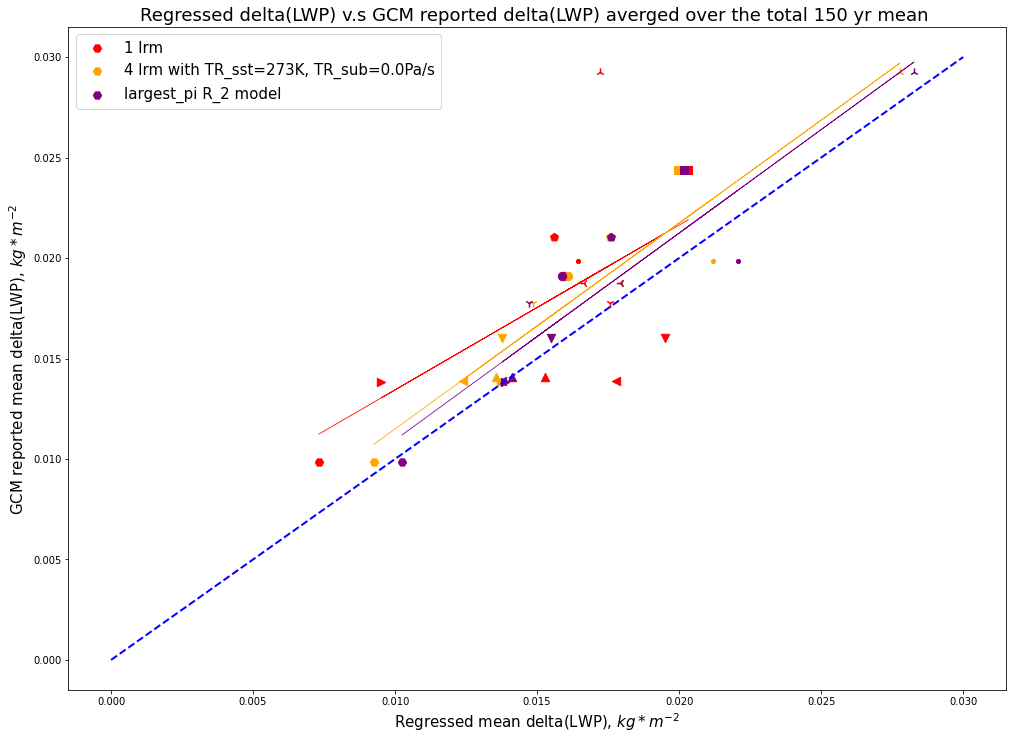

In [26]:
from scipy.optimize import curve_fit

def target_func(x, m, k):
    '''
    1-d line linear fit
    '''
    
    y = m*x+ k
    
    return y


### D(lwp) for GCM report values and LRM predict values

fig6  = plt.figure(figsize =(16.8, 12.2))  #(16.2, 9.3))
ax6  = plt.axes()

#x =  arange(0.003, 0.018, 0.003)   #..15 yr
#x =  arange(0.006, 0.032, 0.003)   #..150yrs
x =    arange(-0.000, 0.032, 0.002)   # for all
y =  x

deck_marker = [',', '.', 'v', '^', '<', '>', 'o', '1', '2', '3', 'p', 'H', 'x', 'D', 'h', '4', 'd']

# output_dabr_pi_obspredi  = {}

output_mons = {}
regr_data_0K =   []
report_data_0K =   []

regr_data_273K = []
report_data_273K = []

regr_data_leastabrbias = []
report_data_leastabrbias = []

regr_data_largestpiR2 = []
report_data_largestpiR2 = []

yr   =  150
h = []
# plt.gcf()

for a in range(len(deck)):    
    
    output_mons[deck_nas[a]]  = arange(shape_mon_modelabr[deck_nas[a]])   #..how many years for collected 'abr-4x' data

    scap1 = plt.scatter(output_meandelta_LWP[deck_nas[a]+'_predict_150yrs_0K'], output_meandelta_LWP[deck_nas[a]+'_actual_150yrs_0K'], s= 70, marker =deck_marker[a], label= deck_nas[a]+": actual with 1LRM", c = 'red')
    regr_data_0K = append(regr_data_0K, output_meandelta_LWP[deck_nas[a]+'_predict_150yrs_0K'])
    report_data_0K = append(report_data_0K, output_meandelta_LWP[deck_nas[a]+'_actual_150yrs_0K'])
    
    scap2 = plt.scatter(output_meandelta_LWP[deck_nas[a]+'_predict_150yrs_273K'], output_meandelta_LWP[deck_nas[a]+'_actual_150yrs_273K'], s= 70, marker =deck_marker[a], label= deck_nas[a]+": actual with 4LRM", c = 'orange')
    regr_data_273K = append(regr_data_273K, output_meandelta_LWP[deck_nas[a]+'_predict_150yrs_273K'])
    report_data_273K = append(report_data_273K, output_meandelta_LWP[deck_nas[a]+'_actual_150yrs_273K'])
    '''
    scap3 = plt.scatter(output_meandelta_LWP[deck_nas[a]+'_predict_150yrs_leastabrbias'], output_meandelta_LWP[deck_nas[a]+'_actual_150yrs_leastabrbias'], s= 80,  marker =deck_marker[a], label= deck_nas[a]+": actual with Least abr_bias LRM", c = 'green')
    regr_data_leastabrbias = append(regr_data_leastabrbias, output_meandelta_LWP[deck_nas[a]+'_predict_150yrs_leastabrbias'])
    report_data_leastabrbias = append(report_data_leastabrbias, output_meandelta_LWP[deck_nas[a]+'_actual_150yrs_leastabrbias'])
    '''
    
    scap3 = plt.scatter(output_meandelta_LWP[deck_nas[a]+'_predict_150yrs_largestpiR2'], output_meandelta_LWP[deck_nas[a]+'_actual_150yrs_largestpiR2'], s= 70, marker =deck_marker[a], label= deck_nas[a]+": actual with Largets PI_R_2 LRM", c = 'purple')
    regr_data_largestpiR2 = append(regr_data_largestpiR2, output_meandelta_LWP[deck_nas[a]+'_predict_150yrs_largestpiR2'])
    report_data_largestpiR2 = append(report_data_largestpiR2, output_meandelta_LWP[deck_nas[a]+'_actual_150yrs_largestpiR2'])
    
    
    # #.. Observation (MAC_LWP) calced sensitivity for each of GCMs
    # output_dabr_pi_obspredi[deck_nas[a]]  = output_obsercoef_predi[deck_nas[a]][shape_yr_modelPI[deck_nas[a]]:] - mean(output_obsercoef_predi[deck_nas[a]][0:shape_yr_modelPI[deck_nas[a]]])
    # plt.scatter(output_dabr_pi_obspredi[deck_nas[a]][yr],  output_dabr_pi_report[deck_nas[a]][yr] , s = 125., label = deck_nas[a] + ' add OBS sensitivities')
    # h = append(h, output_dabr_pi_obspredi[deck_nas[a]])
    

###..linear curve fit for regressed d(LWP) and reported d(LWP) for 0K
POPT_0K, POCV_0K  = curve_fit(target_func, regr_data_0K, report_data_0K)

# Calc the R square, plot the fit line:
calced_ydata_0K = target_func(regr_data_0K, *POPT_0K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
residual_ydata_0K = array(report_data_0K) - array(calced_ydata_0K)

ss_res_0K       = sum(residual_ydata_0K **2)
ss_tot_0K       = sum((report_data_0K - mean(report_data_0K)) **2)
R_square_0K  = 1 - (ss_res_0K / ss_tot_0K)

fitp1 = plt.plot(regr_data_0K, POPT_0K[0]*regr_data_0K+POPT_0K[1], label='1 lrm fit line y = %.3f *x + %.4f, r^2=%.5f' % (POPT_0K[0], POPT_0K[1], R_square_0K), c = 'red', linewidth = 0.8)    


###..linear curve fit for regressed d(LWP) and reported d(LWP) for 273K
POPT_273K, POCV_273K  = curve_fit(target_func, regr_data_273K, report_data_273K)

# Calc the R square, plot the fit line:
calced_ydata_273K = target_func(regr_data_273K, *POPT_273K)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
residual_ydata_273K = array(report_data_273K) - array(calced_ydata_273K)

ss_res_273K       = sum(residual_ydata_273K **2)
ss_tot_273K       = sum((report_data_273K - mean(report_data_273K)) **2)
R_square_273K  = 1 - (ss_res_273K / ss_tot_273K)

fitp2 = plt.plot(regr_data_273K, POPT_273K[0]*regr_data_273K+POPT_273K[1], label='4 lrm fit line y = %.3f *x + %.4f, r^2=%.5f' % (POPT_273K[0], POPT_273K[1], R_square_273K), c = 'orange', linewidth = 0.8)

'''
###..linear curve fit for regressed d(LWP) and reported d(LWP) for least_bias model

POPT_leastabrbias, POCV_leastabrbias  = curve_fit(target_func, regr_data_leastabrbias, report_data_leastabrbias)

# Calc the R square, plot the fit line:
calced_ydata_leastabrbias = target_func(regr_data_leastabrbias, *POPT_leastabrbias)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
residual_ydata_leastabrbias = array(report_data_leastabrbias) - array(calced_ydata_leastabrbias)

ss_res_leastabrbias       = sum(residual_ydata_leastabrbias **2)
ss_tot_leastabrbias       = sum((report_data_leastabrbias - mean(report_data_leastabrbias)) **2)
R_square_leastabrbias  = 1 - (ss_res_leastabrbias / ss_tot_leastabrbias)

fitp3 = plt.plot(regr_data_leastabrbias, POPT_leastabrbias[0]*regr_data_leastabrbias+POPT_leastabrbias[1], label='least abs(abr_bias) fit line y = %.3f *x + %.4f, r^2=%.5f' % (POPT_leastabrbias[0], POPT_leastabrbias[1], R_square_leastabrbias), c = 'green', linewidth = 0.8)
'''
# Add Reference line:
Refp  = plt.plot(x, y, label = 'reference line', c='blue', linestyle='--', linewidth=2)



#....linear curve fit for regressed d(LWP) and reported d(LWP) for largest_pi_R_2 model
POPT_largestpiR2, POCV_largestpiR2  = curve_fit(target_func, regr_data_largestpiR2, report_data_largestpiR2)

# Calc the R square, plot the fit line:
calced_ydata_largestpiR2 = target_func(regr_data_largestpiR2, *POPT_largestpiR2)   #..[target_func(x, POPT[0], POPT[1]) for x in regr_data]
residual_ydata_largestpiR2 = array(report_data_largestpiR2) - array(calced_ydata_largestpiR2)

ss_res_largestpiR2       = sum(residual_ydata_largestpiR2 **2)
ss_tot_largestpiR2       = sum((report_data_largestpiR2 - mean(report_data_largestpiR2)) **2)
R_square_largestpiR2  = 1 - (ss_res_largestpiR2 / ss_tot_largestpiR2)

fitp3 = plt.plot(regr_data_largestpiR2, POPT_largestpiR2[0]*regr_data_largestpiR2 + POPT_largestpiR2[1], label='largest PI_R_2 fit line y = %.3f *x + %.4f, r^2=%.5f' % (POPT_largestpiR2[0], POPT_largestpiR2[1], R_square_largestpiR2), c = 'purple', linewidth = 0.8)
### end fit plotting



# Observational band:
# plt.plot(full(len(x), (min(h) - 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)
# plt.plot(full(len(x), (max(h) + 0.0001)) ,y, linestyle = '--' , c = 'k', linewidth = 1.3)

plt.xlabel('Regressed mean delta(LWP), ' + r'$kg* m^{-2}$', fontsize= 15)
plt.ylabel('GCM reported mean delta(LWP), '+r'$kg*m^{-2}$', fontsize= 15)

plt.title("Regressed delta(LWP) v.s GCM reported delta(LWP) " + "averged over the total %d yr mean "%(yr), fontsize =18)
ax6.legend([scap1, scap2, scap3], ['1 lrm', '4 lrm with TR_sst=273K, TR_sub=0.0Pa/s', 'largest_pi R_2 model'], fontsize = 15)
# plt.legend(loc='upper right', fontsize =9)


plt.savefig('A_shows_0K&273K&Bestfit6_whole150yrs')
